In [1]:
import os
import random
from Bio.PDB import PDBParser, PPBuilder
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Align.Applications import ClustalwCommandline
from Bio.Blast import NCBIWWW
from Bio import SearchIO
from Bio.PDB import *
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Phylo import draw


ModuleNotFoundError: No module named 'Bio'

In [2]:
pip install biopython

Note: you may need to restart the kernel to use updated packages.


In [ ]:
def parse_pdb_files(folder):
    sequences = []
    for filename in os.listdir(folder):
        if filename.endswith(".pdb"):
            pdb_file = os.path.join(folder, filename)
            try:
                # Increase the timeout value to None (disable timeout)
                structure = PDBParser(QUIET=True, timeout=None).get_structure(filename, pdb_file)
                ppb = PPBuilder()
                for model in structure:
                    for chain in model:
                        peptides = ppb.build_peptides(chain)
                        for pp in peptides:
                            sequences.append(str(pp.get_sequence()))
            except Exception as e:
                print(f"Error reading {filename}: {e}")
    return sequences


In [7]:
import os

# Function to extract sequences from PDB file contents
def extract_sequences_from_pdb_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                # Extract sequence information from SEQRES records
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

# Folder path containing PDB files
folder_path = r"C:\Users\manik\Downloads\DAA DATASET\pdb_files"

# Dictionary to store PDB IDs and corresponding sequences
pdb_data = {}

# Read sequences and PDB IDs from each PDB file
for filename in os.listdir(folder_path):
    if filename.endswith(".pdb"):
        pdb_file_path = os.path.join(folder_path, filename)
        pdb_id = filename[:-4]  # Extract PDB ID from filename (remove extension)
        sequence = extract_sequences_from_pdb_file(pdb_file_path)
        pdb_data[pdb_id] = sequence

# Check if sequences are available for comparison
if len(pdb_data) < 2:
    print("Error: Not enough PDB files available for comparison. Make sure there are at least two .pdb files in the specified folder.")
else:
    # Print available PDB IDs
    print("Available PDB IDs:")
    for pdb_id in pdb_data:
        print(pdb_id)

    # Prompt user to enter PDB IDs for comparison
    selected_ids = input("Enter the PDB IDs you want to compare (e.g., '1A2Y, 2Z1B'): ")
    selected_ids = [pdb_id.strip() for pdb_id in selected_ids.split(',')]

    # Validate selected PDB IDs
    if len(selected_ids) != 2 or any(pdb_id not in pdb_data for pdb_id in selected_ids):
        print("Error: Please enter exactly two valid PDB IDs from the list.")
    else:
        # Assign selected sequences to seq1 and seq2
        seq1 = pdb_data[selected_ids[0]]
        seq2 = pdb_data[selected_ids[1]]

        # Print the selected sequences
        print(f"Sequence 1 ({selected_ids[0]}): {seq1}")
        print(f"Sequence 2 ({selected_ids[1]}): {seq2}")


Available PDB IDs:
1A04
1A22
1A6A
1A8J
1A9W
1AFW
1AKH
1B00
1B09
1BG8
1BWX
1C1Z
1C8U
1CI4
1CL0
1CMA
1CNT
1D8H
1DD9
1DK8
1DP5
1DPS
1E0A
1E0T
1E94
1E9N
1EIG
1EKR
1EKU
1EKX
1ELK
1EQQ
1F0Z
1F3V
1F47
1F9P
1F9Q
1FAS
1FE0
1FOS
1FUG
1G5V
1G76
1GGZ
1GMX
1GOS
1GS5
1GYK
1GZS
1H6F
1HU3
1HY9
1I1J
1I7F
1I8D
1IBX
1IGA
1J2M
1JBI
1JEB
1JHF
1JW2
1JZD
1K92
1KA6
1KHU
1KI1
1KMI
1KS2
1KSG
1KUV
1LV9
1LX5
1MKF
1MNM
1MOX
1MZW
1N99
1NED
1NI7
1NUN
1O6S
1ODD
1OGA
1P3W
1P6F
1PIL
1PQ1
1Q05
1Q2H
1QCZ
1QF6
1QZ7
1QZU
1R0D
1R1P
1R1U
1R94
1RI9
1RJT
1S1N
1S7U
1SG2
1SYX
1T3D
1TJL
1U6Z
1U7U
1UAD
1UKV
1UMU
1UN2
1V0D
1V66
1W0R
1WCH
1WYW
1XHE
1XJA
1XS0
1XUT
1XWH
1XWI
1YBA
1YIO
1Z01
1Z7X
1ZJK
1ZUK
1ZVU
2A0Z
2A1R
2A41
2A73
2AK5
2AO6
2AX4
2AXN
2BEC
2BMC
2BZL
2C0J
2CIA
2CKK
2CL3
2CPC
2D1K
2D39
2D46
2DA7
2DH5
2DIL
2DIX
2DJY
2DNR
2DVW
2EBZ
2EQM
2EQR
2ERJ
2F8V
2FB4
2FFK
2FIC
2G77
2GD4
2H8H
2HQS
2HT1
2IBI
2ID4
2IFS
2IG2
2IHC
2IJE
2IOP
2IWQ
2J1L
2J90
2JCN
2JEE
2JG8
2JLL
2JXZ
2K2I
2K86
2KDI
2KJY
2KKR
2KLR
2KXS
2KZ3
2KZK
2L35
2L4N
2L58
2

Enter the PDB IDs you want to compare (e.g., '1A2Y, 2Z1B'):  1A04, 1A6A


Sequence 1 (1A04): SERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEUASPPROASPLEUILELEULEUASPLEUASNMETPROGLYMETASNGLYLEUGLUTHRLEUASPLYSLEUARGGLULYSSERLEUSERGLYARGILEVALVALPHESERVALSERASNHISGLUGLUASPVALVALTHRALALEULYSARGGLYALAASPGLYTYRLEULEULYSASPMETGLUPROGLUASPLEULEULYSALALEUHISGLNALAALAALAGLYGLUMETVALLEUSERGLUALALEUTHRPROVALLEUALAALASERLEUARGALAASNARGALATHRTHRGLUARGASPVALASNGLNLEUTHRPROARGGLUARGASPILELEULYSLEUILEALAGLNGLYLEUPROASNLYSMETILEALAARGARGLEUASPILETHRGLUSERTHRVALLYSVALHISVALLYSHISMETLEULYSLYSMETLYSLEULYSSERARGVALGLUALAALAVALTRPVALHISGLNGLUARGILEPHESERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEUASPPROASPLEUILELEULEUASPLEUASNMETPROGLYMETASNGLYLEUGLUTHRLEUASPLYSLEUARGGLULYSSERLEUSERGLYARGILEVALVALPHESERVALSERASNHISGLUGLUASPVALVALTHRALALEULYSARGGLYALAASPGLYTYRLEULEULYSASPMETGLUPRO

In [8]:
# Function to truncate sequences to a specified length
def truncate_sequence(seq, length):
    return seq[:length]

# Define the desired length for the compressed sequences
compressed_length1 = 150  # Adjust this value as needed
compressed_length2 = 145

# Apply sequence truncation to the randomly selected sequences
seq1 = truncate_sequence(seq1, compressed_length1)
seq2 = truncate_sequence(seq2, compressed_length2)

# Print the truncated sequences
print("Truncated Sequence 1:", seq1)
print("Truncated Sequence 2:", seq2)


Truncated Sequence 1: SERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEU
Truncated Sequence 2: HISVALILEILEGLNALAGLUPHETYRLEUASNPROASPGLNSERGLYGLUPHEMETPHEASPPHEASPGLYASPGLUILEPHEHISVALASPMETALALYSLYSGLUTHRVALTRPARGLEUGLUGLUPHEGLYARGPHEALAS


Maximum score : -35
Alignment:
--SE-RAS-N-G---LN-GLU-PROALAT-H-R-I-L-EL-E-U-LEUILEAS-P--ASPH-I--SP-RO---------METL--EUAR-G-T-HR----GLYVALLYS-GLNLEUILES--ER-M-E-T-ALAPROASPI-LETHRVALVALG--LY-GLU----ALA-SER-AS-NGLY--GLUGLN----GLYI-L-EGL-U-LEUALAGLUSERLEU
HIS-V-A-L-I-LEIL-EGL-N---ALA-G-L-U-P-HE-T-Y-RLEU---ASNPROASP-G-LNS-ER-GLYGLUPHEMET-PHE-A-S-P-PH-EASPGLY-A---SPG--L-UILE-PHE-H-I-S-VAL----ASP-M-ET---AL-AL-YSLYSGLUTHRVAL-T--RPA-R-GL-EUGLUGL-UPHEGLY-A-R-G-P-H-E-ALA---S-----
Average time taken for Needleman-Wunsch algorithm: 0.031517195701599124 seconds


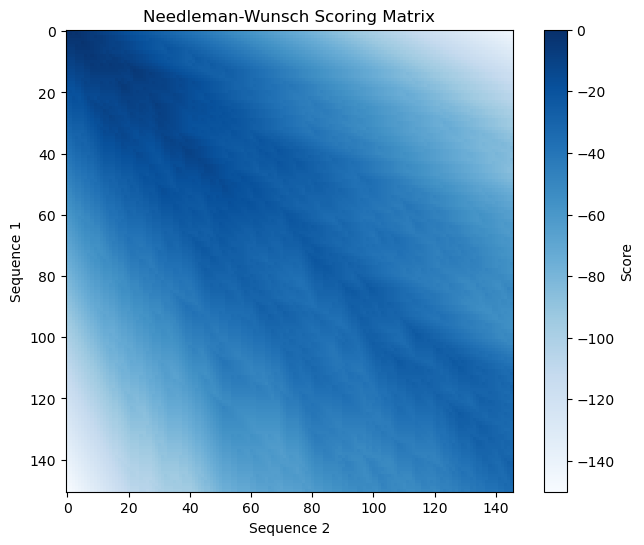

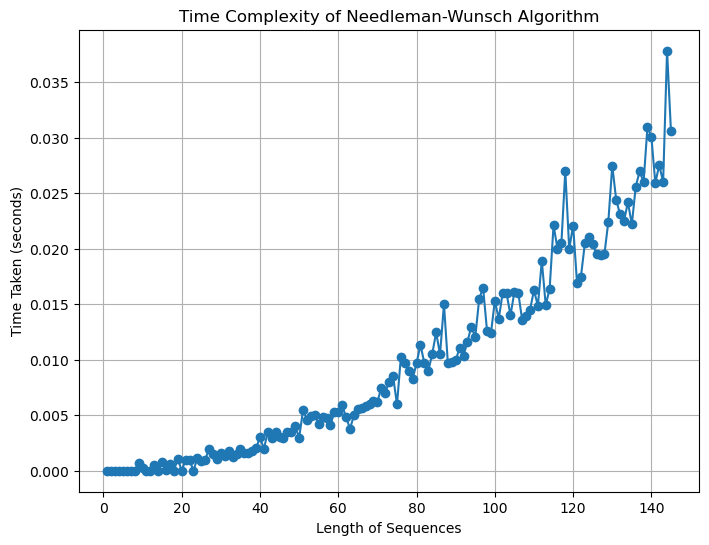

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Needleman-Wunsch algorithm for computing minimum edit distance
def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap=-1):
    m, n = len(seq1), len(seq2)
    
    # Initialize DP table
    dp = np.zeros((m + 1, n + 1), dtype=int)
    
    # Fill DP table
    for i in range(1, m + 1):
        dp[i][0] = dp[i - 1][0] + gap
    for j in range(1, n + 1):
        dp[0][j] = dp[0][j - 1] + gap
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                diag_score = dp[i - 1][j - 1] + match
            else:
                diag_score = dp[i - 1][j - 1] + mismatch
            
            left_score = dp[i][j - 1] + gap
            up_score = dp[i - 1][j] + gap
            
            dp[i][j] = max(diag_score, left_score, up_score)
    
    # Traceback to find the alignment and minimum edit distance
    align1, align2 = [], []
    i, j = m, n
    
    while i > 0 or j > 0:
        if i > 0 and j > 0 and (seq1[i - 1] == seq2[j - 1]):
            align1.append(seq1[i - 1])
            align2.append(seq2[j - 1])
            i -= 1
            j -= 1
        elif i > 0 and dp[i][j] == dp[i - 1][j] + gap:
            align1.append(seq1[i - 1])
            align2.append('-')
            i -= 1
        else:
            align1.append('-')
            align2.append(seq2[j - 1])
            j -= 1
    
    align1.reverse()
    align2.reverse()
    
    min_edit_distance = dp[m][n]
    alignment = ("".join(align1), "".join(align2))
    
    return min_edit_distance, alignment, dp

# Number of runs to average
num_runs = 10

# Measure the average time taken for the Needleman-Wunsch algorithm execution
times = []
for _ in range(num_runs):
    start_time = time.time()
    min_edit_distance, alignment, dp_matrix = needleman_wunsch(seq1, seq2)
    end_time = time.time()
    times.append(end_time - start_time)

# Calculate the average time taken
time_needleman = np.mean(times)

# Print the minimum edit distance, alignment, and average time taken
print(f"Maximum score : {min_edit_distance}")
print("Alignment:")
print(alignment[0])
print(alignment[1])
print(f"Average time taken for Needleman-Wunsch algorithm: {time_needleman} seconds")

# Plot the DP matrix (scoring matrix)
plt.figure(figsize=(8, 6))
plt.imshow(dp_matrix, cmap='Blues', origin='upper', interpolation='nearest')
plt.title('Needleman-Wunsch Scoring Matrix')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.colorbar(label='Score')
plt.show()

# Measure time complexity for different sequence lengths
sequence_lengths = range(1, min(len(seq1), len(seq2)) + 1)
time_taken_values = []

for length in sequence_lengths:
    subseq1 = seq1[:length]
    subseq2 = seq2[:length]
    
    times = []
    for _ in range(num_runs):
        start_time = time.time()
        min_edit_distance, alignment, dp_matrix = needleman_wunsch(subseq1, subseq2)
        end_time = time.time()
        times.append(end_time - start_time)
    
    avg_time_taken = np.mean(times)
    time_taken_values.append(avg_time_taken)

# Plotting time complexity graph
plt.figure(figsize=(8, 6))
plt.plot(sequence_lengths, time_taken_values, marker='o')
plt.xlabel('Length of Sequences')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Complexity of Needleman-Wunsch Algorithm')
plt.grid(True)
plt.show()


Maximum Score: 22
Alignment:
METALAPROASPILETHRVAL--VALGL-YGLUAL
METALALYSLYSGLUTHRVALTRPARGLEUGLUGL
Average time taken for Smith-Waterman algorithm: 0.04099802970886231 seconds


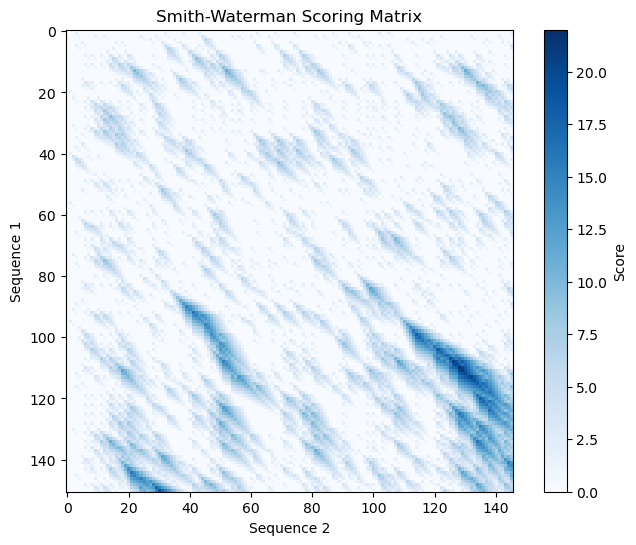

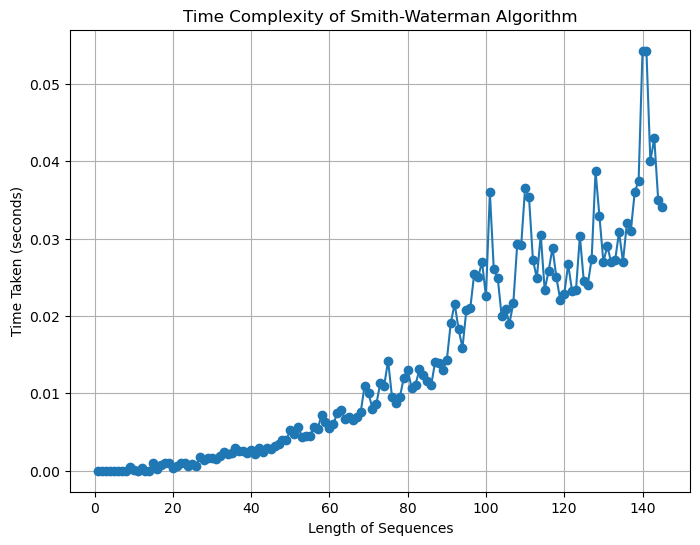

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time

def smith_waterman(seq1, seq2, match=2, mismatch=-1, gap=-2):
    m, n = len(seq1), len(seq2)
    
    # Initialize DP table and traceback table
    dp = np.zeros((m + 1, n + 1), dtype=int)
    
    max_score = 0
    max_i, max_j = 0, 0
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                match_score = dp[i - 1][j - 1] + match
            else:
                match_score = dp[i - 1][j - 1] + mismatch
            
            dp[i][j] = max(0, match_score, dp[i][j - 1] + gap, dp[i - 1][j] + gap)
            
            if dp[i][j] > max_score:
                max_score = dp[i][j]
                max_i, max_j = i, j
    
    # Traceback to retrieve alignment
    align1, align2 = [], []
    i, j = max_i, max_j
    
    while i > 0 and j > 0 and dp[i][j] > 0:
        if dp[i][j] == dp[i - 1][j - 1] + (match if seq1[i - 1] == seq2[j - 1] else mismatch):
            align1.append(seq1[i - 1])
            align2.append(seq2[j - 1])
            i -= 1
            j -= 1
        elif dp[i][j] == dp[i][j - 1] + gap:
            align1.append('-')
            align2.append(seq2[j - 1])
            j -= 1
        else:
            align1.append(seq1[i - 1])
            align2.append('-')
            i -= 1
    
    align1.reverse()
    align2.reverse()
    
    alignment = ("".join(align1), "".join(align2))
    return max_score, alignment, dp

def measure_time_complexity(seq1, seq2, num_iterations=10):
    sequence_lengths = range(1, min(len(seq1), len(seq2)) + 1)
    time_taken_values = []
    
    for length in sequence_lengths:
        subseq1 = seq1[:length]
        subseq2 = seq2[:length]
        
        total_time = 0.0
        
        for _ in range(num_iterations):
            start_time = time.time()
            max_score, alignment, dp_matrix = smith_waterman(subseq1, subseq2)
            end_time = time.time()
            total_time += (end_time - start_time)
        
        avg_time_taken = total_time / num_iterations
        time_taken_values.append(avg_time_taken)
    
    return sequence_lengths, time_taken_values


# Number of runs to average
num_runs = 10

# Measure the average time taken for the Smith-Waterman algorithm execution
times = []
for _ in range(num_runs):
    start_time = time.time()
    max_score, alignment, dp_matrix = smith_waterman(seq1, seq2)
    end_time = time.time()
    times.append(end_time - start_time)

# Calculate the average time taken
time_smithwaterman = np.mean(times)

# Print the maximum score, alignment, and average time taken
print(f"Maximum Score: {max_score}")
print("Alignment:")
print(alignment[0])
print(alignment[1])
print(f"Average time taken for Smith-Waterman algorithm: {time_smithwaterman} seconds")

# Plot the DP matrix (scoring matrix)
plt.figure(figsize=(8, 6))
plt.imshow(dp_matrix, cmap='Blues', origin='upper', interpolation='nearest')
plt.title('Smith-Waterman Scoring Matrix')
plt.xlabel('Sequence 2')
plt.ylabel('Sequence 1')
plt.colorbar(label='Score')
plt.show()

# Measure time complexity for different sequence lengths
sequence_lengths, time_taken_values = measure_time_complexity(seq1, seq2)

# Plotting time complexity graph
plt.figure(figsize=(8, 6))
plt.plot(sequence_lengths, time_taken_values, marker='o')
plt.xlabel('Length of Sequences')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Complexity of Smith-Waterman Algorithm')
plt.grid(True)
plt.show()


DALI Alignment:
Alignment Score: 92.0
Dynamic Programming Matrix:
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  1.  1. ...  1.  1.  0.]
 [ 0.  1.  2. ...  2.  2.  1.]
 ...
 [ 0.  1.  2. ... 90. 91. 92.]
 [ 0.  1.  2. ... 91. 91. 92.]
 [ 0.  1.  2. ... 92. 92. 92.]]
Average time taken for DALI algorithm: 0.027908706665039064 seconds


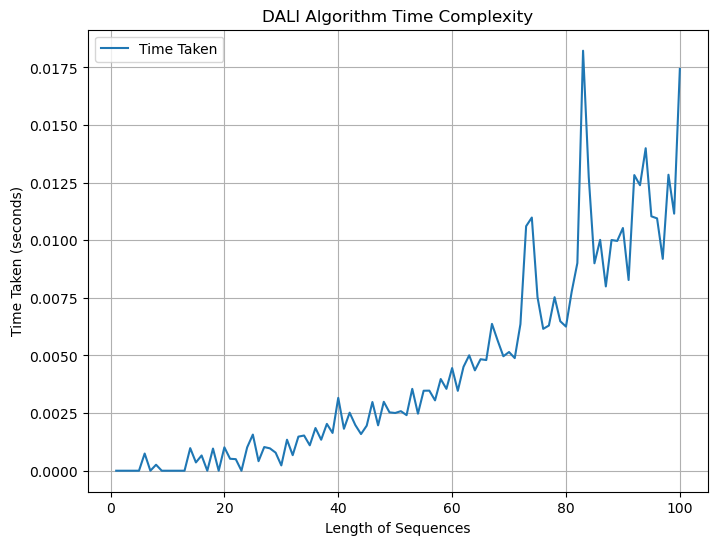

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

# DALI alignment algorithm
def dali_alignment(seq1, seq2):
    # Initialize the distance matrix
    distance_matrix = np.zeros((len(seq1), len(seq2)))
    
    # Calculate distances between residues
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            if seq1[i] == seq2[j]:
                distance_matrix[i, j] = 0
            else:
                distance_matrix[i, j] = 1
    
    # Dynamic programming to find optimal alignment
    # Initialize the DP matrix
    dp_matrix = np.zeros((len(seq1) + 1, len(seq2) + 1))
    for i in range(1, len(seq1) + 1):
        for j in range(1, len(seq2) + 1):
            # Match/mismatch score
            match = dp_matrix[i-1, j-1] + distance_matrix[i-1, j-1]
            # Gap penalties
            gap1 = dp_matrix[i-1, j] + 1
            gap2 = dp_matrix[i, j-1] + 1
            # Choose the minimum score
            dp_matrix[i, j] = min(match, gap1, gap2)
    
    # Calculate alignment score
    alignment_score = dp_matrix[-1, -1]
    
    # Return alignment score and dynamic programming matrix
    return alignment_score, dp_matrix


# Number of runs to average
num_runs = 10

# Measure the average time taken for the DALI alignment algorithm execution
times = []
for _ in range(num_runs):
    start_time = time.time()
    alignment_score, dp_matrix = dali_alignment(seq1, seq2)
    end_time = time.time()
    times.append(end_time - start_time)

# Calculate the average time taken
time_DALI = np.mean(times)

# Print the DALI alignment score, dynamic programming matrix, and average time taken
print("DALI Alignment:")
print("Alignment Score:", alignment_score)
print("Dynamic Programming Matrix:")
print(dp_matrix)
print(f"Average time taken for DALI algorithm: {time_DALI} seconds")

# Generate sequences of varying lengths for time complexity analysis
seq_lengths = np.arange(1, 101)  # Example: Sequences of lengths 1 to 100
time_taken = []

# Measure time taken for alignment for each sequence length
for length in seq_lengths:
    subseq1 = seq1[:length]
    subseq2 = seq2[:length]
    total_time = 0.0
    
    for _ in range(num_runs):
        start_time = time.time()
        _, _ = dali_alignment(subseq1, subseq2)
        end_time = time.time()
        total_time += (end_time - start_time)
    
    avg_time_taken = total_time / num_runs
    time_taken.append(avg_time_taken)

# Plot the time complexity
plt.figure(figsize=(8, 6))
plt.plot(seq_lengths, time_taken, label='Time Taken')
plt.xlabel('Length of Sequences')
plt.ylabel('Time Taken (seconds)')
plt.title('DALI Algorithm Time Complexity')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
import os
import random

# Function to extract sequences from PDB file contents
def extract_sequences_from_pdb_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                # Extract sequence information from SEQRES records
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

# Folder path containing PDB files
folder_path = r"C:\Users\manik\Downloads\DAA DATASET\pdb_files"

# List to store sequences from PDB files
all_sequences = []

# Read sequences from each PDB file
for filename in os.listdir(folder_path):
    if filename.endswith(".pdb"):
        pdb_file_path = os.path.join(folder_path, filename)
        sequence = extract_sequences_from_pdb_file(pdb_file_path)
        all_sequences.append(sequence)

# Check if sequences are available for comparison
if len(all_sequences) < 2:
    print("Error: Not enough sequences available for comparison. Make sure there are at least two PDB files in the specified folder.")
else:
    # Sample two random sequences from the dataset
    seq3, seq4, seq5, seq6, seq7,seq8, seq9, seq10, seq11, seq12 = random.sample(all_sequences, 10)

    # Print the randomly selected sequences
    print("Randomly Selected Sequences:")
    print("Sequence 3:", seq3)
    print("Sequence 4:", seq4)
    print("Sequence 5:", seq5)
    print("Sequence 6:", seq6)
    print("Sequence 7:", seq7)
    print("Sequence 8:", seq8)
    print("Sequence 9:", seq9)
    print("Sequence 10:", seq10)
    print("Sequence 11:", seq11)
    print("Sequence 12:", seq12)


Randomly Selected Sequences:
Sequence 3: GLYSERSERGLYSERSERGLYALAGLNGLUTYRARGALALEUTYRASPTYRTHRALAGLNASNPROASPGLULEUASPLEUSERALAGLYASPILELEUGLUVALILELEUGLUGLYGLUASPGLYTRPTRPTHRVALGLUARGASNGLYGLNARGGLYPHEVALPROGLYSERTYRLEUGLULYSLEUSERGLYPROSERSERGLY
Sequence 4: METGLYSERSERHISHISHISHISHISHISGLYSERMETTYRGLYVALTYRARGALAMETLYSLEUPROILETYRLEUASPTYRSERALATHRTHRPROVALASPPROARGVALALAGLULYSMETMETGLNPHEMETTHRMETASPGLYTHRPHEGLYASNPROALASERARGSERHISARGPHEGLYTRPGLNALAGLUGLUALAVALASPILEALAARGASNGLNILEALAASPLEUVALGLYALAASPPROARGGLUILEVALPHETHRSERGLYALATHRGLUSERASPASNLEUALAILELYSGLYALAALAASNPHETYRGLNLYSLYSGLYLYSHISILEILETHRSERLYSTHRGLUHISLYSALAVALLEUASPTHRCYSARGGLNLEUGLUARGGLUGLYPHEGLUVALTHRTYRLEUALAPROGLNARGASNGLYILEILEASPLEULYSGLULEUGLUALAALAMETARGASPASPTHRILELEUVALSERILEMETHISVALASNASNGLUILEGLYVALVALGLNASPILEALAALAILEGLYGLUMETCYSARGALAARGGLYILEILETYRHISVALASPALATHRGLNSERVALGLYLYSLEUPROILEASPLEUSERGLNLEULYSVALASPLEUMETSERPHESERGLYHISLYSILETYRGLYPROLYSGLYILEGLYALALEUTYRVALARGARGLYSPROARGVALARGILEGLUA

In [16]:
# Function to truncate sequences to a specified length
def truncate_sequence(seq, length):
    return seq[:length]

# Define the desired length for the compressed sequences
compressed_length = 25  # Adjust this value as needed


# Apply sequence truncation to the randomly selected sequences
truncated_seq3 = truncate_sequence(seq3, compressed_length)
truncated_seq4 = truncate_sequence(seq4, compressed_length)
truncated_seq5 = truncate_sequence(seq5, compressed_length)
truncated_seq6 = truncate_sequence(seq6, compressed_length)
truncated_seq7 = truncate_sequence(seq7, compressed_length)
truncated_seq8 = truncate_sequence(seq8, compressed_length)
truncated_seq9 = truncate_sequence(seq9, compressed_length)
truncated_seq10 = truncate_sequence(seq10, compressed_length)
truncated_seq11 = truncate_sequence(seq11, compressed_length)
truncated_seq12 = truncate_sequence(seq12, compressed_length)

# Print the truncated sequences
print("Truncated Sequence 3:", truncated_seq3)
print("Truncated Sequence 4:", truncated_seq4)
print("Truncated Sequence 5:", truncated_seq5)
print("Truncated Sequence 6:", truncated_seq6)
print("Truncated Sequence 7:", truncated_seq7)
print("Truncated Sequence 8:", truncated_seq8)
print("Truncated Sequence 9:", truncated_seq9)
print("Truncated Sequence 10:", truncated_seq10)
print("Truncated Sequence 11:", truncated_seq11)
print("Truncated Sequence 12:", truncated_seq12)




Truncated Sequence 3: GLYSERSERGLYSERSERGLYALAG
Truncated Sequence 4: METGLYSERSERHISHISHISHISH
Truncated Sequence 5: GLNSERVALLEUTHRGLNPROPROS
Truncated Sequence 6: PROILEPHELEUASNVALLEUGLUA
Truncated Sequence 7: METSERASPGLNLEUGLNMETTHRA
Truncated Sequence 8: METARGLEUTHRSERLYSGLYARGT
Truncated Sequence 9: SERASNALAASPGLUPROILELEUS
Truncated Sequence 10: METSERPROILELEUGLYTYRTRPL
Truncated Sequence 11: ARGSERPROTRPPROGLYPROPROP
Truncated Sequence 12: METASPLYSPROLYSARGLYSGLUA


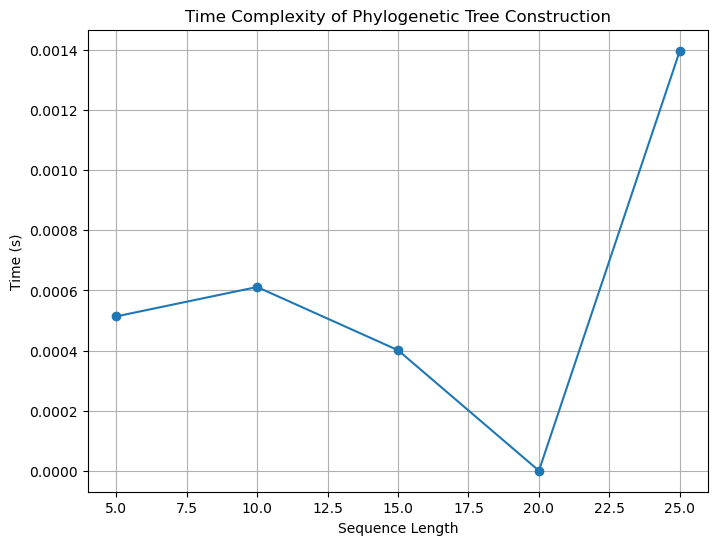

Average time taken for phylogenetic tree construction: 0.0009214401245117188 seconds


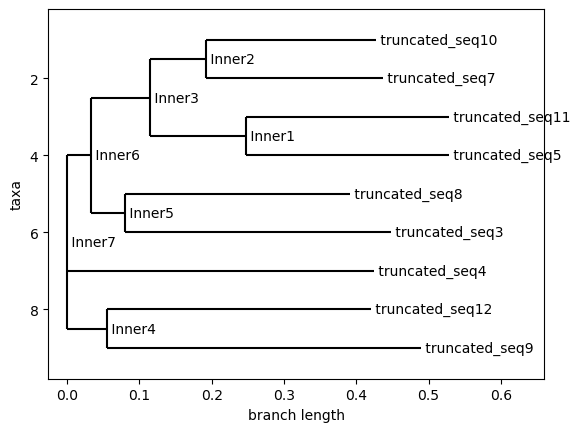

Minimum edit distance between truncated_seq10 and truncated_seq7: 0
Minimum edit distance between truncated_seq10 and truncated_seq11: 2
Minimum edit distance between truncated_seq10 and truncated_seq5: 2
Minimum edit distance between truncated_seq10 and truncated_seq8: 3
Minimum edit distance between truncated_seq10 and truncated_seq3: 3
Minimum edit distance between truncated_seq10 and truncated_seq4: 3
Minimum edit distance between truncated_seq10 and truncated_seq12: 4
Minimum edit distance between truncated_seq10 and truncated_seq9: 4
Minimum edit distance between truncated_seq7 and truncated_seq11: 2
Minimum edit distance between truncated_seq7 and truncated_seq5: 2
Minimum edit distance between truncated_seq7 and truncated_seq8: 3
Minimum edit distance between truncated_seq7 and truncated_seq3: 3
Minimum edit distance between truncated_seq7 and truncated_seq4: 3
Minimum edit distance between truncated_seq7 and truncated_seq12: 4
Minimum edit distance between truncated_seq7 and t

In [17]:
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio import Phylo
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to truncate sequences to a specified length
def truncate_sequence(seq, length):
    return seq[:length]

# Function to measure time complexity for different sequence lengths
def measure_time_complexity(truncated_sequences, sequence_lengths, num_runs=10):
    time_complexity = []
    for length in sequence_lengths:
        # Truncate sequences to the specified length
        truncated_seqs = [truncate_sequence(seq.seq, length) for seq in truncated_sequences]
        
        # Create a MultipleSeqAlignment object from the truncated sequences
        truncated_alignment = MultipleSeqAlignment([SeqRecord(Seq(str(seq)), id=f'Seq{i+1}') for i, seq in enumerate(truncated_seqs)])
        
        # Measure time complexity for the alignment
        total_time = 0.0
        for _ in range(num_runs):
            start_time = time.time()
            _ = DistanceCalculator('identity').get_distance(truncated_alignment)
            end_time = time.time()
            total_time += (end_time - start_time)
        
        avg_time_taken = total_time / num_runs
        time_complexity.append(avg_time_taken)
    
    return time_complexity

# Function to find the path between two nodes in the tree
def find_path(tree, start, end):
    common_ancestor = tree.common_ancestor({"name": start}, {"name": end})
    path_start_to_common = tree.trace(start, common_ancestor)
    path_end_to_common = tree.trace(end, common_ancestor)
    full_path = path_start_to_common + path_end_to_common[::-1]
    return full_path

# Function to calculate pairwise minimum edit distance using the phylogenetic tree
def calculate_pairwise_edit_distance_from_tree(truncated_sequences, tree):
    edit_distances = {}
    leaves = tree.get_terminals()

    for i in range(len(leaves)):
        for j in range(i + 1, len(leaves)):
            seq1_id = leaves[i].name
            seq2_id = leaves[j].name
            seq1 = next(seq for seq in truncated_sequences if seq.id == seq1_id)
            seq2 = next(seq for seq in truncated_sequences if seq.id == seq2_id)
            
            # Find the path between the two sequences in the tree
            path = find_path(tree, seq1_id, seq2_id)
            
            # Calculate the minimum edit distance by summing the distances in the path
            distance = 0
            for k in range(len(path) - 1):
                node1 = path[k]
                node2 = path[k + 1]
                distance += sum(1 for a, b in zip(node1.name, node2.name) if a != b)
            
            edit_distances[(seq1_id, seq2_id)] = distance
    
    return edit_distances

# Example truncated sequences (replace with your actual sequences)
truncated_sequences = [
    SeqRecord(Seq(truncated_seq3), id="truncated_seq3"),
    SeqRecord(Seq(truncated_seq4), id="truncated_seq4"),
    SeqRecord(Seq(truncated_seq5), id="truncated_seq5"),
    SeqRecord(Seq(truncated_seq7), id="truncated_seq7"),
    SeqRecord(Seq(truncated_seq8), id="truncated_seq8"),
    SeqRecord(Seq(truncated_seq9), id="truncated_seq9"),
    SeqRecord(Seq(truncated_seq10), id="truncated_seq10"),
    SeqRecord(Seq(truncated_seq11), id="truncated_seq11"),
    SeqRecord(Seq(truncated_seq12), id="truncated_seq12"),
]

# Determine the minimum length among the truncated sequences
min_length = min(len(seq.seq) for seq in truncated_sequences)

# Truncate all sequences to the minimum length
truncated_sequences = [SeqRecord(truncate_sequence(seq.seq, min_length), id=seq.id) for seq in truncated_sequences]

# Measure time complexity for different sequence lengths
sequence_lengths = np.arange(5, min_length + 1, 5)
time_complexity = measure_time_complexity(truncated_sequences, sequence_lengths)

# Plot the time complexity graph
plt.figure(figsize=(8, 6))
plt.plot(sequence_lengths, time_complexity, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Time (s)')
plt.title('Time Complexity of Phylogenetic Tree Construction')
plt.grid(True)
plt.show()

# Measure average time taken for phylogenetic tree construction
num_runs = 10
total_time = 0.0
for _ in range(num_runs):
    start_time = time.time()
    alignment = MultipleSeqAlignment(truncated_sequences)
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    end_time = time.time()
    total_time += (end_time - start_time)

time_phylogenetic = total_time / num_runs

# Print the average time taken for phylogenetic tree construction
print(f"Average time taken for phylogenetic tree construction: {time_phylogenetic} seconds")

# Draw the phylogenetic tree
Phylo.draw(tree)

# Calculate pairwise minimum edit distance guided by the tree
edit_distances = calculate_pairwise_edit_distance_from_tree(truncated_sequences, tree)

# Print pairwise minimum edit distances
for pair, distance in edit_distances.items():
    print(f"Minimum edit distance between {pair[0]} and {pair[1]}: {distance}")


In [18]:
import random

def generate_random_pattern(length):
    """
    Generate a random pattern of the specified length suitable for comparison with the provided sequences.
    
    Args:
    - length (int): Length of the pattern to be generated.
    
    Returns:
    - str: Random pattern of the specified length.
    """
    # Characters used in the provided sequences
    sequence_chars = 'ACDEFGHIKLMNPQRSTVWY'
    
    # Generate random pattern using sequence characters
    pattern = ''.join(random.choice(sequence_chars) for _ in range(length))
    return pattern

# Example: Generate a random pattern of length 10
random_pattern = generate_random_pattern(3)
print("Random Pattern for Comparison:", random_pattern)


Random Pattern for Comparison: ERL


In [19]:
def compute_prefix_function(pattern):
    m = len(pattern)
    pi = [0] * m
    k = 0
    for q in range(1, m):
        while k > 0 and pattern[k] != pattern[q]:
            k = pi[k - 1]
        if pattern[k] == pattern[q]:
            k += 1
        pi[q] = k
    return pi

def kmp_match(text, pattern):
    n = len(text)
    m = len(pattern)
    pi = compute_prefix_function(pattern)
    q = 0
    matches = []
    for i in range(n):
        while q > 0 and pattern[q] != text[i]:
            q = pi[q - 1]
        if pattern[q] == text[i]:
            q += 1
        if q == m:
            matches.append(i - m + 1)
            q = pi[q - 1]
    return matches

# Truncated sequences (text)
truncated_sequences = [
    truncated_seq3,
    truncated_seq4,
    truncated_seq5,
    truncated_seq6,
    truncated_seq7,
    truncated_seq8,
    truncated_seq9,
    truncated_seq10,
    truncated_seq11,
    truncated_seq12,
]

# Perform string matching for each truncated sequence using the random pattern
for i, text in enumerate(truncated_sequences, start=3):
    matches = kmp_match(text, random_pattern)
    if matches:
        print(f"Pattern found in Seq{i} at positions:", matches)
    else:
        print(f"Pattern not found in Seq{i}")


Pattern not found in Seq3
Pattern not found in Seq4
Pattern not found in Seq5
Pattern not found in Seq6
Pattern not found in Seq7
Pattern found in Seq8 at positions: [13]
Pattern not found in Seq9
Pattern not found in Seq10
Pattern not found in Seq11
Pattern not found in Seq12


Minimum Edit Distance between seq1 and seq2: 101
Average time taken for Levenshtein Distance calculation: 0.002627736782205516 seconds


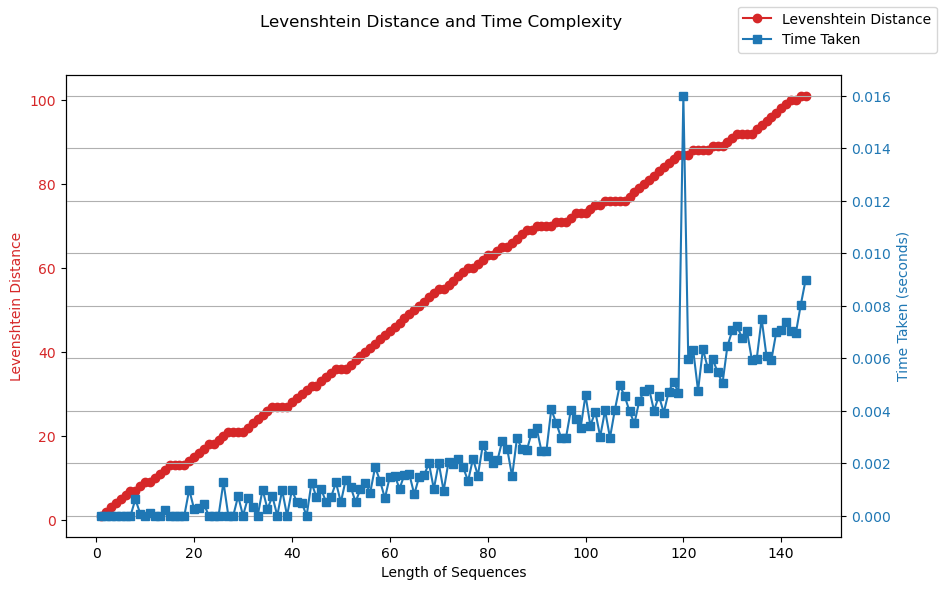

SERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEU


In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

def levenshtein_distance(s1, s2):
    m, n = len(s1), len(s2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if s1[i - 1] == s2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)
    
    return dp[m][n]

# Function to measure time complexity for Levenshtein Distance calculations
def measure_time_complexity(seq1, seq2, num_runs=10):
    time_taken = []
    distance_values = []
    sequence_lengths = range(1, min(len(seq1), len(seq2)) + 1)

    for length in sequence_lengths:
        total_time = 0.0
        distance = 0
        for _ in range(num_runs):
            start_time = time.time()
            distance = levenshtein_distance(seq1[:length], seq2[:length])
            end_time = time.time()
            total_time += (end_time - start_time)
        
        avg_time_taken = total_time / num_runs
        time_taken.append(avg_time_taken)
        distance_values.append(distance)

    return sequence_lengths, time_taken, distance_values


# Measure time complexity and compute Levenshtein Distance
sequence_lengths, time_taken, distance_values = measure_time_complexity(seq1, seq2)

# Extract the minimum edit distance (final value in distance_values)
min_edit_distance = distance_values[-1]
print("Minimum Edit Distance between seq1 and seq2:", min_edit_distance)

# Calculate average time taken for Levenshtein Distance calculation
time_levenshtein = sum(time_taken) / len(time_taken)
print(f"Average time taken for Levenshtein Distance calculation: {time_levenshtein} seconds")

# Plotting Levenshtein Distance and Time Complexity
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Levenshtein Distance
color = 'tab:red'
ax1.set_xlabel('Length of Sequences')
ax1.set_ylabel('Levenshtein Distance', color=color)
ax1.plot(sequence_lengths, distance_values, color=color, marker='o', label='Levenshtein Distance')
ax1.tick_params(axis='y', labelcolor=color)

# Creating a second y-axis for Time Complexity
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time Taken (seconds)', color=color)
ax2.plot(sequence_lengths, time_taken, color=color, marker='s', label='Time Taken')
ax2.tick_params(axis='y', labelcolor=color)

# Adding legends and title
fig.suptitle('Levenshtein Distance and Time Complexity')
fig.legend(loc='upper right')
plt.grid(True)
plt.show()
print(seq1)


Minimum Edit Distance for length 1: 1
Minimum Edit Distance for length 2: 2
Minimum Edit Distance for length 3: 2
Minimum Edit Distance for length 4: 4
Minimum Edit Distance for length 5: 5
Minimum Edit Distance for length 6: 6
Minimum Edit Distance for length 7: 7
Minimum Edit Distance for length 8: 8
Minimum Edit Distance for length 9: 9
Minimum Edit Distance for length 10: 10
Minimum Edit Distance for length 11: 11
Minimum Edit Distance for length 12: 12
Minimum Edit Distance for length 13: 11
Minimum Edit Distance for length 14: 13
Minimum Edit Distance for length 15: 15
Minimum Edit Distance for length 16: 15
Minimum Edit Distance for length 17: 16
Minimum Edit Distance for length 18: 16
Minimum Edit Distance for length 19: 16
Minimum Edit Distance for length 20: 17
Minimum Edit Distance for length 21: 20
Minimum Edit Distance for length 22: 21
Minimum Edit Distance for length 23: 21
Minimum Edit Distance for length 24: 22
Minimum Edit Distance for length 25: 20
Minimum Edit Dista

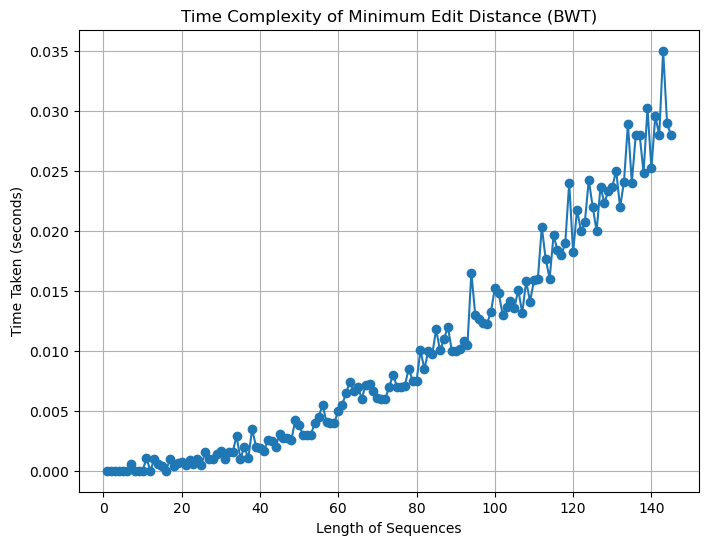

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import time

def burrows_wheeler_transform(text):
    rotations = [text[i:] + text[:i] for i in range(len(text))]
    rotations.sort()
    bwt = ''.join(rot[-1] for rot in rotations)
    return bwt

def minimum_edit_distance_bwt(seq1, seq2):
    # Apply Burrows-Wheeler Transform (BWT)
    bwt_seq1 = burrows_wheeler_transform(seq1)
    bwt_seq2 = burrows_wheeler_transform(seq2)
    
    # Compute minimum edit distance using dynamic programming
    m, n = len(bwt_seq1), len(bwt_seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)
    
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j
    
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if bwt_seq1[i - 1] == bwt_seq2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)
    
    return dp[m][n]

def measure_time_complexity(seq1, seq2, num_runs=10):
    sequence_lengths = range(1, min(len(seq1), len(seq2)) + 1)
    time_taken_values = []
    distance_values = []

    for length in sequence_lengths:
        total_time = 0.0
        min_edit_distance = 0
        for _ in range(num_runs):
            subseq1 = seq1[:length]
            subseq2 = seq2[:length]
            start_time = time.time()
            min_edit_distance = minimum_edit_distance_bwt(subseq1, subseq2)
            end_time = time.time()
            total_time += (end_time - start_time)
        
        avg_time_taken = total_time / num_runs
        time_taken_values.append(avg_time_taken)
        distance_values.append(min_edit_distance)
        
        # Print the minimum edit distance calculated
        print(f"Minimum Edit Distance for length {length}: {min_edit_distance}")

    return sequence_lengths, time_taken_values, distance_values

# Measure time complexity and compute minimum edit distance using BWT
sequence_lengths, time_taken_values, distance_values = measure_time_complexity(seq1, seq2)

# Extract the minimum edit distance (final value in distance_values)
min_edit_distance = distance_values[-1]
print("Minimum Edit Distance between seq1 and seq2:", min_edit_distance)

# Calculate average time taken for minimum edit distance calculation using BWT
time_bwt = sum(time_taken_values) / len(time_taken_values)
print(f"Average time taken for minimum edit distance calculation using BWT: {time_bwt} seconds")

# Plotting time complexity graph
plt.figure(figsize=(8, 6))
plt.plot(sequence_lengths, time_taken_values, marker='o')
plt.xlabel('Length of Sequences')
plt.ylabel('Time Taken (seconds)')
plt.title('Time Complexity of Minimum Edit Distance (BWT)')
plt.grid(True)
plt.show()


Average time taken for Wagner-Fischer algorithm: 0.004601385831832886 seconds


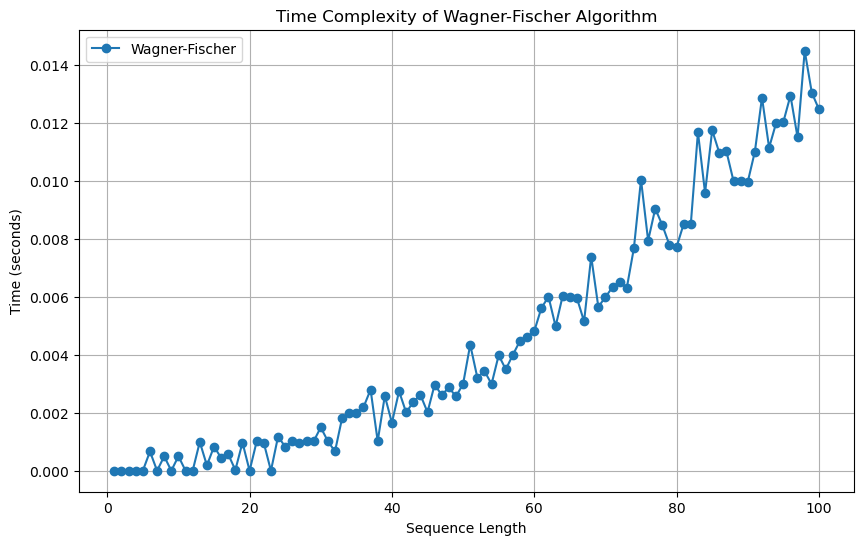

Minimum Edit Distance (Wagner-Fischer): 2506


In [22]:
import numpy as np
import matplotlib.pyplot as plt
import time

def wagner_fischer_edit_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)

    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)

    min_edit_distance = dp[m][n]
    return min_edit_distance

def measure_time_complexity(algorithm, seq1, seq2, max_length, num_runs=10):
    seq_lengths = list(range(1, max_length + 1))
    avg_times = []

    for length in seq_lengths:
        total_time = 0.0

        for _ in range(num_runs):
            start_time = time.time()
            algorithm(seq1[:length], seq2[:length])
            end_time = time.time()
            total_time += (end_time - start_time)

        avg_time_taken = total_time / num_runs
        avg_times.append(avg_time_taken)

    return seq_lengths, avg_times

# Set the maximum sequence length for testing
max_length = 100

# Example sequences (assuming seq1 and seq2 are defined)
seq1 = seq1 * (max_length // 4)
seq2 = seq2 * (max_length // 4)

# Measure time complexity for Wagner-Fischer algorithm
lengths_wf, times_wf = measure_time_complexity(wagner_fischer_edit_distance, seq1, seq2, max_length)

# Calculate and print the average time taken for Wagner-Fischer algorithm
time_wf = sum(times_wf) / len(times_wf)
print(f"Average time taken for Wagner-Fischer algorithm: {time_wf} seconds")

# Plotting time complexity graph for Wagner-Fischer algorithm
plt.figure(figsize=(10, 6))
plt.plot(lengths_wf, times_wf, label='Wagner-Fischer', marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity of Wagner-Fischer Algorithm')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the minimum edit distance for the full-length sequences
min_edit_distance = wagner_fischer_edit_distance(seq1, seq2)
print(f"Minimum Edit Distance (Wagner-Fischer): {min_edit_distance}")


Sequence Length: 1, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 1
Sequence Length: 2, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 2
Sequence Length: 3, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 3
Sequence Length: 4, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 4
Sequence Length: 5, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 5
Sequence Length: 6, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 6
Sequence Length: 7, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 7
Sequence Length: 8, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 7
Sequence Length: 9, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 8
Sequence Length: 10, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 9
Sequence Length: 11, Average Time Taken: 0.000551 seconds, Minimum Edit Distance: 9
Sequence Length: 12, Average Time Taken: 0.000000 seconds, Minimum Edit Distance: 10


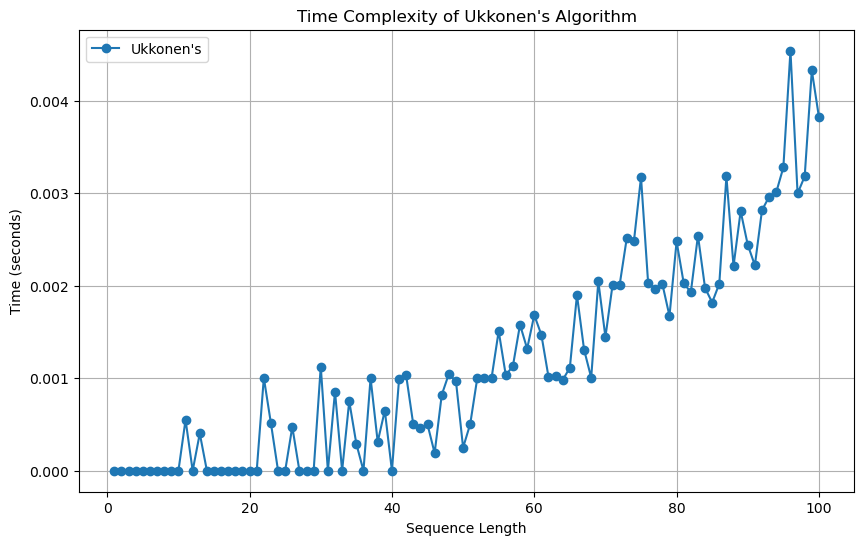

In [24]:
def ukkonen_edit_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    # Use two rows to optimize space
    prev_row = list(range(n + 1))
    curr_row = [0] * (n + 1)

    for i in range(1, m + 1):
        curr_row[0] = i
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            curr_row[j] = min(prev_row[j] + 1, curr_row[j - 1] + 1, prev_row[j - 1] + cost)
        # Update prev_row for the next iteration
        prev_row = curr_row[:]
    
    min_edit_distance = curr_row[n]
    return min_edit_distance

def measure_time_complexity(algorithm, seq1, seq2, max_length, num_runs=10):
    seq_lengths = list(range(1, max_length + 1))
    avg_times = []

    for length in seq_lengths:
        total_time = 0.0

        for _ in range(num_runs):
            start_time = time.time()
            algorithm(seq1[:length], seq2[:length])
            end_time = time.time()
            total_time += (end_time - start_time)

        avg_time_taken = total_time / num_runs
        avg_times.append(avg_time_taken)
        min_edit_distance = algorithm(seq1[:length], seq2[:length])
        print(f"Sequence Length: {length}, Average Time Taken: {avg_time_taken:.6f} seconds, Minimum Edit Distance: {min_edit_distance}")

    return seq_lengths, avg_times

# Set the maximum sequence length for testing
max_length = 100

# Example sequences (distinct sequences for accurate edit distance)
seq1 = seq1 * (max_length // 4)
seq2 = seq2 * (max_length // 4)  

# Measure time complexity for Ukkonen's algorithm
lengths_uk, times_uk = measure_time_complexity(ukkonen_edit_distance, seq1, seq2, max_length)

# Calculate and print the average time taken for Ukkonen's algorithm
time_uk = sum(times_uk) / len(times_uk)
print(f"Average time taken for Ukkonen's algorithm: {time_uk:.6f} seconds")

# Plotting time complexity graph for Ukkonen's algorithm
plt.figure(figsize=(10, 6))
plt.plot(lengths_uk, times_uk, label="Ukkonen's", marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Time (seconds)')
plt.title("Time Complexity of Ukkonen's Algorithm")
plt.legend()
plt.grid(True)
plt.show()


Average time taken for DTW algorithm: 0.015842856001108886 seconds


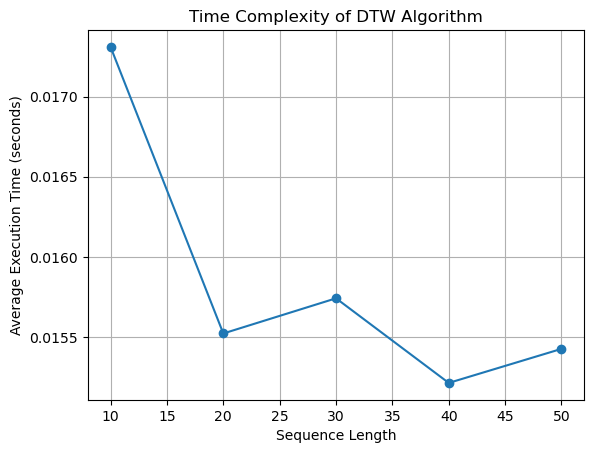

In [25]:
import numpy as np
import timeit
import matplotlib.pyplot as plt

def dtw_distance(seq1, seq2):
    n = len(seq1)
    m = len(seq2)
    
    prev_row = np.zeros(m + 1)
    curr_row = np.zeros(m + 1)
    
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            cost = abs(ord(seq1[i - 1]) - ord(seq2[j - 1]))
            curr_row[j] = cost + min(prev_row[j], curr_row[j - 1], prev_row[j - 1])
        
        # Swap rows
        prev_row, curr_row = curr_row, prev_row
    
    return prev_row[m]

def test_time_complexity(seq1, seq2, num_runs=10):
    setup = f"from __main__ import dtw_distance, seq1, seq2"
    time_taken = timeit.timeit("dtw_distance(seq1, seq2)", setup=setup, number=num_runs)
    return time_taken / num_runs

seq1 = seq1[:150]  # Adjusted sequence 1
seq2 = seq2[:145]  # Adjusted sequence 2

seq_lengths = [10, 20, 30, 40, 50]  # Adjusted sequence lengths to test
avg_times = [test_time_complexity(seq1[:length], seq2[:length]) for length in seq_lengths]

# Calculate and print the average time taken for the DTW algorithm
avg_time_dtw = sum(avg_times) / len(avg_times)
print(f"Average time taken for DTW algorithm: {avg_time_dtw} seconds")

# Plotting the time complexity graph
plt.plot(seq_lengths, avg_times, marker='o')
plt.xlabel('Sequence Length')
plt.ylabel('Average Execution Time (seconds)')
plt.title('Time Complexity of DTW Algorithm')
plt.grid(True)
plt.show()


In [26]:
import pandas as pd

# Define the algorithms and their average times
algos = ['Needleman-Wunsch', 'Smith-Waterman', 'DALI', 'Phylogenetic tree', 'Levenshtein', 'Burrows-Wheeler', 
         "Wagner-Fischer", "Ukkonen's", 'DTW']
avg_times = [time_needleman, time_smithwaterman, time_DALI, time_phylogenetic, time_levenshtein, time_bwt,
             time_wf, time_uk, avg_time_dtw]

# Check the lengths of the arrays
print(len(algos))  # Ensure it matches the length of avg_times

# Create a Pandas DataFrame
df = pd.DataFrame({'Algorithm': algos, 'Average Time (seconds)': avg_times})

# Style the DataFrame
styled_df = df.style.set_properties(**{'background-color': 'white', 'color': 'black', 'font-weight': 'bold'})

# Hide the index
styled_df = styled_df.set_table_styles([dict(selector="th", props=[("font-weight", "bold")])])

# Display the styled DataFrame
styled_df


9


,Algorithm,Average Time (seconds)
0,Needleman-Wunsch,0.031517
1,Smith-Waterman,0.040998
2,DALI,0.027909
3,Phylogenetic tree,0.000921
4,Levenshtein,0.002628
5,Burrows-Wheeler,0.009874
6,Wagner-Fischer,0.004601
7,Ukkonen's,0.001183
8,DTW,0.015843


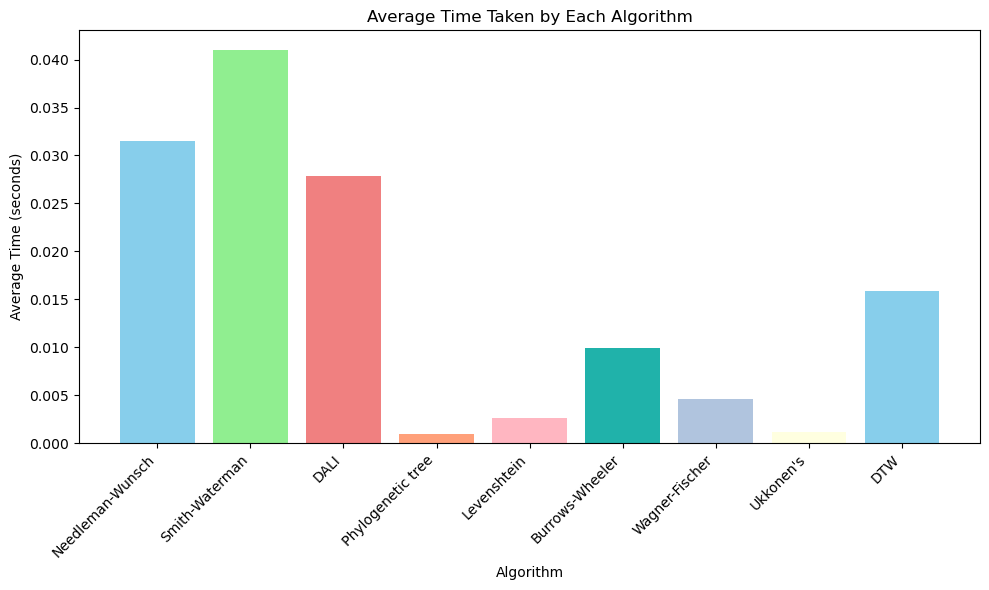

In [27]:
import matplotlib.pyplot as plt

# Define colors for each algorithm
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue', 'lightyellow']

# Convert average times to milliseconds
avg_times_ms = [time  for time in avg_times]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(df['Algorithm'], avg_times_ms, color=colors)
plt.xlabel('Algorithm')
plt.ylabel('Average Time (seconds)')
plt.title('Average Time Taken by Each Algorithm')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [4]:
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

# Define the DNA sequences to be compared (make sure these are valid nucleotide sequences)
sequence_1 = """>sequence_1
ATGCGTACGTTAGCTAGCTAAGCTAGCTAGCTGATCGAGTGCGTGCGTAAGGCTAGCGGCTAGCG
GCTAGTGCATGCTAGTGCATAGTCGAGCAGAGTGCGTGCAGTGGG"""
sequence_2 = """>sequence_2
ATGCGTACGTTAGCTAGCTAGCGTACGCGTAGAGAGTGCGTGCAGTGGGCTAGTGCTAGTCGAG"""

# Perform BLAST search on the sequences
def run_blast(sequence):
    result_handle = NCBIWWW.qblast("blastn", "nt", sequence)
    return result_handle

# Run BLAST for both sequences
result_handle_1 = run_blast(sequence_1)
result_handle_2 = run_blast(sequence_2)

# Parse the results from the BLAST output
blast_records_1 = NCBIXML.parse(result_handle_1)
blast_records_2 = NCBIXML.parse(result_handle_2)

# Function to analyze and compare BLAST results
def analyze_blast(blast_records):
    matches = []
    for blast_record in blast_records:
        for alignment in blast_record.alignments:
            for hsp in alignment.hsps:
                matches.append(hsp.expect)
    return matches

# Extract and compare similarity based on e-values
matches_1 = analyze_blast(blast_records_1)
matches_2 = analyze_blast(blast_records_2)

# Analyze if there are significant matches (lower e-values indicate higher similarity)
threshold = 1e-10  # Common threshold for significant similarity
similarity_1 = any(match < threshold for match in matches_1)
similarity_2 = any(match < threshold for match in matches_2)

if similarity_1 and similarity_2:
    print("Both sequences are highly similar based on BLAST comparison.")
else:
    print("Sequences are not highly similar based on BLAST comparison.")


Sequences are not highly similar based on BLAST comparison.


In [6]:
import os
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

# Function to extract sequences from PDB file contents
def extract_sequences_from_pdb_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                # Extract sequence information from SEQRES records
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

# Folder path containing PDB files
folder_path = r"C:\Users\manik\Downloads\DAA DATASET\pdb_files"

# Dictionary to store PDB IDs and corresponding sequences
pdb_data = {}

# Read sequences and PDB IDs from each PDB file
for filename in os.listdir(folder_path):
    if filename.endswith(".pdb"):
        pdb_file_path = os.path.join(folder_path, filename)
        pdb_id = filename[:-4]  # Extract PDB ID from filename (remove extension)
        sequence = extract_sequences_from_pdb_file(pdb_file_path)
        pdb_data[pdb_id] = sequence

# Check if sequences are available for comparison
if len(pdb_data) < 2:
    print("Error: Not enough PDB files available for comparison. Make sure there are at least two .pdb files in the specified folder.")
else:
    # Print available PDB IDs
    print("Available PDB IDs:")
    for pdb_id in pdb_data:
        print(pdb_id)

    # Prompt user to enter PDB IDs for comparison
    selected_ids = input("Enter the PDB IDs you want to compare (e.g., '1A2Y, 2Z1B'): ")
    selected_ids = [pdb_id.strip() for pdb_id in selected_ids.split(',')]

    # Validate selected PDB IDs
    if len(selected_ids) != 2 or any(pdb_id not in pdb_data for pdb_id in selected_ids):
        print("Error: Please enter exactly two valid PDB IDs from the list.")
    else:
        # Assign selected sequences to seq1 and seq2
        seq1 = pdb_data[selected_ids[0]]
        seq2 = pdb_data[selected_ids[1]]

        # Print the selected sequences
        print(f"\nSequence 1 ({selected_ids[0]}): {seq1}")
        print(f"Sequence 2 ({selected_ids[1]}): {seq2}")

        # Perform sequence alignment using pairwise2 (global alignment)
        alignments = pairwise2.align.globalxx(seq1, seq2)

        # Print the best alignment
        print("\nBest alignment:")
        print(format_alignment(*alignments[0]))

        # Calculate the percentage identity
        matches = alignments[0][2]  # Number of matches in the best alignment
        total_length = max(len(seq1), len(seq2))
        percentage_identity = (matches / total_length) * 100

        print(f"\nPercentage Identity: {percentage_identity:.2f}%")


Available PDB IDs:
1A04
1A22
1A6A
1A8J
1A9W
1AFW
1AKH
1B00
1B09
1BG8
1BWX
1C1Z
1C8U
1CI4
1CL0
1CMA
1CNT
1D8H
1DD9
1DK8
1DP5
1DPS
1E0A
1E0T
1E94
1E9N
1EIG
1EKR
1EKU
1EKX
1ELK
1EQQ
1F0Z
1F3V
1F47
1F9P
1F9Q
1FAS
1FE0
1FOS
1FUG
1G5V
1G76
1GGZ
1GMX
1GOS
1GS5
1GYK
1GZS
1H6F
1HU3
1HY9
1I1J
1I7F
1I8D
1IBX
1IGA
1J2M
1JBI
1JEB
1JHF
1JW2
1JZD
1K92
1KA6
1KHU
1KI1
1KMI
1KS2
1KSG
1KUV
1LV9
1LX5
1MKF
1MNM
1MOX
1MZW
1N99
1NED
1NI7
1NUN
1O6S
1ODD
1OGA
1P3W
1P6F
1PIL
1PQ1
1Q05
1Q2H
1QCZ
1QF6
1QZ7
1QZU
1R0D
1R1P
1R1U
1R94
1RI9
1RJT
1S1N
1S7U
1SG2
1SYX
1T3D
1TJL
1U6Z
1U7U
1UAD
1UKV
1UMU
1UN2
1V0D
1V66
1W0R
1WCH
1WYW
1XHE
1XJA
1XS0
1XUT
1XWH
1XWI
1YBA
1YIO
1Z01
1Z7X
1ZJK
1ZUK
1ZVU
2A0Z
2A1R
2A41
2A73
2AK5
2AO6
2AX4
2AXN
2BEC
2BMC
2BZL
2C0J
2CIA
2CKK
2CL3
2CPC
2D1K
2D39
2D46
2DA7
2DH5
2DIL
2DIX
2DJY
2DNR
2DVW
2EBZ
2EQM
2EQR
2ERJ
2F8V
2FB4
2FFK
2FIC
2G77
2GD4
2H8H
2HQS
2HT1
2IBI
2ID4
2IFS
2IG2
2IHC
2IJE
2IOP
2IWQ
2J1L
2J90
2JCN
2JEE
2JG8
2JLL
2JXZ
2K2I
2K86
2KDI
2KJY
2KKR
2KLR
2KXS
2KZ3
2KZK
2L35
2L4N
2L58
2

Enter the PDB IDs you want to compare (e.g., '1A2Y, 2Z1B'):  1A04, 1A6A



Sequence 1 (1A04): SERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEUASPPROASPLEUILELEULEUASPLEUASNMETPROGLYMETASNGLYLEUGLUTHRLEUASPLYSLEUARGGLULYSSERLEUSERGLYARGILEVALVALPHESERVALSERASNHISGLUGLUASPVALVALTHRALALEULYSARGGLYALAASPGLYTYRLEULEULYSASPMETGLUPROGLUASPLEULEULYSALALEUHISGLNALAALAALAGLYGLUMETVALLEUSERGLUALALEUTHRPROVALLEUALAALASERLEUARGALAASNARGALATHRTHRGLUARGASPVALASNGLNLEUTHRPROARGGLUARGASPILELEULYSLEUILEALAGLNGLYLEUPROASNLYSMETILEALAARGARGLEUASPILETHRGLUSERTHRVALLYSVALHISVALLYSHISMETLEULYSLYSMETLYSLEULYSSERARGVALGLUALAALAVALTRPVALHISGLNGLUARGILEPHESERASNGLNGLUPROALATHRILELEULEUILEASPASPHISPROMETLEUARGTHRGLYVALLYSGLNLEUILESERMETALAPROASPILETHRVALVALGLYGLUALASERASNGLYGLUGLNGLYILEGLULEUALAGLUSERLEUASPPROASPLEUILELEULEUASPLEUASNMETPROGLYMETASNGLYLEUGLUTHRLEUASPLYSLEUARGGLULYSSERLEUSERGLYARGILEVALVALPHESERVALSERASNHISGLUGLUASPVALVALTHRALALEULYSARGGLYALAASPGLYTYRLEULEULYSASPMETGLUPR

In [ ]:
import tkinter as tk
from tkinter import filedialog, messagebox
import time
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Phylo import draw
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
import numpy as np

# Functions for Algorithms

def extract_sequences_from_pdb_file(file_path):
    """Extract sequences from PDB files."""
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

def needleman_wunsch(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    return alignments[0]

def smith_waterman(seq1, seq2):
    alignments = pairwise2.align.localxx(seq1, seq2)
    return alignments[0]

def dali_alignment(seq1, seq2):
    distance_matrix = np.zeros((len(seq1), len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            distance_matrix[i, j] = 0 if seq1[i] == seq2[j] else 1
    alignment_score = np.sum(distance_matrix)
    return alignment_score, distance_matrix

def burrows_wheeler_transform(text):
    rotations = [text[i:] + text[:i] for i in range(len(text))]
    rotations.sort()
    return ''.join(rot[-1] for rot in rotations)

def levenshtein_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            dp[i, j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)

    return dp[m][n]

def wagner_fischer(seq1, seq2):
    return levenshtein_distance(seq1, seq2)

def kmp_match(text, pattern):
    m, n = len(pattern), len(text)
    pi = [0] * m
    j = 0

    for i in range(1, m):
        while j > 0 and pattern[i] != pattern[j]:
            j = pi[j - 1]
        if pattern[i] == pattern[j]:
            j += 1
        pi[i] = j

    matches = []
    j = 0
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = pi[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            matches.append(i - m + 1)
            j = pi[j - 1]
    return matches

def phylogenetic_tree(sequences):
    alignment = MultipleSeqAlignment([SeqRecord(Seq(seq), id=f"Seq{i+1}") for i, seq in enumerate(sequences)])
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    return tree

def ukkonen_edit_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    prev_row = list(range(n + 1))
    curr_row = [0] * (n + 1)
    for i in range(1, m + 1):
        curr_row[0] = i
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            curr_row[j] = min(prev_row[j] + 1, curr_row[j - 1] + 1, prev_row[j - 1] + cost)
        prev_row = curr_row[:]
    return curr_row[n]

def dynamic_time_warping(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=float)
    dp[0, 1:] = np.inf
    dp[1:, 0] = np.inf

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = abs(ord(seq1[i - 1]) - ord(seq2[j - 1]))
            dp[i, j] = cost + min(dp[i - 1, j], dp[i, j - 1], dp[i - 1, j - 1])

    return dp[m, n]

# GUI Functions

def run_alignment():
    file1 = entry_file1.get()
    file2 = entry_file2.get()

    try:
        seq1 = extract_sequences_from_pdb_file(file1)
        seq2 = extract_sequences_from_pdb_file(file2)

        algorithm = selected_algorithm.get()
        start_time = time.time()

        if algorithm == "Needleman-Wunsch":
            alignment = needleman_wunsch(seq1, seq2)
            align_score = alignment[2]
            result = format_alignment(*alignment)
        elif algorithm == "Smith-Waterman":
            alignment = smith_waterman(seq1, seq2)
            align_score = alignment[2]
            result = format_alignment(*alignment)
        elif algorithm == "DALI":
            align_score, _ = dali_alignment(seq1, seq2)
            result = f"DALI Alignment Score: {align_score}"
        elif algorithm == "Burrows-Wheeler Transform (BWT)":
            result = burrows_wheeler_transform(seq1)
            align_score = len(result)
            result = f"BWT Result: {result[:100]}..."  # Show only first 100 characters for brevity
        elif algorithm == "Levenshtein Distance":
            align_score = levenshtein_distance(seq1, seq2)
            result = f"Levenshtein Distance: {align_score}"
        elif algorithm == "Wagner-Fischer":
            align_score = wagner_fischer(seq1, seq2)
            result = f"Wagner-Fischer Distance: {align_score}"
        elif algorithm == "Knuth-Morris-Pratt (KMP)":
            matches = kmp_match(seq1, seq2)
            align_score = len(matches)
            result = f"KMP Pattern Matches at positions: {matches}"
        elif algorithm == "Ukkonen’s Algorithm":
            align_score = ukkonen_edit_distance(seq1, seq2)
            result = f"Ukkonen’s Distance: {align_score}"
        elif algorithm == "Dynamic Time Warping (DTW)":
            align_score = dynamic_time_warping(seq1, seq2)
            result = f"DTW Distance: {align_score}"
        elif algorithm == "Phylogenetic Tree Construction":
            tree = phylogenetic_tree([seq1, seq2])
            result = f"Phylogenetic Tree:\n{tree}"
        else:
            raise ValueError("Invalid algorithm selected.")

        elapsed_time = time.time() - start_time
        result_text.delete("1.0", tk.END)
        result_text.insert(tk.END, f"Algorithm: {algorithm}\n")
        result_text.insert(tk.END, f"Result: {result}\n")
        result_text.insert(tk.END, f"Time Taken: {elapsed_time:.4f} seconds\n")

    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

def browse_file1():
    filename = filedialog.askopenfilename(title="Select Sequence 1 File", filetypes=(("PDB files", "*.pdb"), ("All files", "*.*")))
    if filename:
        entry_file1.delete(0, tk.END)
        entry_file1.insert(0, filename)

def browse_file2():
    filename = filedialog.askopenfilename(title="Select Sequence 2 File", filetypes=(("PDB files", "*.pdb"), ("All files", "*.*")))
    if filename:
        entry_file2.delete(0, tk.END)
        entry_file2.insert(0, filename)

# Main GUI Setup
root = tk.Tk()
root.title("Sequence Alignment and Comparison Tool")

# Algorithm Selection
selected_algorithm = tk.StringVar(value="Needleman-Wunsch")
algorithms = [
    "Needleman-Wunsch", "Smith-Waterman", "DALI", "Burrows-Wheeler Transform (BWT)",
    "Levenshtein Distance", "Wagner-Fischer", "Knuth-Morris-Pratt (KMP)",
    "Ukkonen’s Algorithm", "Dynamic Time Warping (DTW)", "Phylogenetic Tree Construction"
]

algorithm_menu = tk.OptionMenu(root, selected_algorithm, *algorithms)
algorithm_menu.grid(row=0, column=1)

# File Input
tk.Label(root, text="Sequence 1 (PDB):").grid(row=1, column=0)
entry_file1 = tk.Entry(root, width=50)
entry_file1.grid(row=1, column=1)
browse_button1 = tk.Button(root, text="Browse", command=browse_file1)
browse_button1.grid(row=1, column=2)

tk.Label(root, text="Sequence 2 (PDB):").grid(row=2, column=0)
entry_file2 = tk.Entry(root, width=50)
entry_file2.grid(row=2, column=1)
browse_button2 = tk.Button(root, text="Browse", command=browse_file2)
browse_button2.grid(row=2, column=2)

# Run Button
run_button = tk.Button(root, text="Run Alignment", command=run_alignment)
run_button.grid(row=3, column=1)

# Results Display
result_text = tk.Text(root, height=10, width=70)
result_text.grid(row=4, column=0, columnspan=3)

root.mainloop()


In [3]:
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
import pandas as pd
import os
import random
from Bio.PDB import PDBParser, PPBuilder
import numpy as np
import time

# Initialize DataFrame to store algorithm performance
data = {
    "Algorithm": [],
    "Average Time (seconds)": []
}
df = pd.DataFrame(data)

# Define the directory containing PDB files
PDB_FOLDER = r"C:\Users\manik\Downloads\DAA DATASET\pdb_files"

# Function to extract sequences from PDB files
def extract_sequences_from_pdb_file(file_path):
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

# Function to run Needleman-Wunsch algorithm
def needleman_wunsch(seq1, seq2, match=1, mismatch=-1, gap=-1):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)

    for i in range(1, m + 1):
        dp[i][0] = dp[i - 1][0] + gap
    for j in range(1, n + 1):
        dp[0][j] = dp[0][j - 1] + gap

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if seq1[i - 1] == seq2[j - 1]:
                diag_score = dp[i - 1][j - 1] + match
            else:
                diag_score = dp[i - 1][j - 1] + mismatch
            left_score = dp[i][j - 1] + gap
            up_score = dp[i - 1][j] + gap
            dp[i][j] = max(diag_score, left_score, up_score)

    return dp[m][n]

# Function to run BLAST analysis
def run_blast(sequence):
    from Bio.Blast import NCBIWWW
    result_handle = NCBIWWW.qblast("blastn", "nt", sequence)
    return result_handle

# Function to compute algorithm performance
def compute_performance():
    try:
        pdb_files = [f for f in os.listdir(PDB_FOLDER) if f.endswith('.pdb')]
        if len(pdb_files) < 2:
            messagebox.showerror("Error", "Not enough PDB files for comparison.")
            return

        seq1 = extract_sequences_from_pdb_file(os.path.join(PDB_FOLDER, pdb_files[0]))
        seq2 = extract_sequences_from_pdb_file(os.path.join(PDB_FOLDER, pdb_files[1]))

        # Measure time for Needleman-Wunsch
        start_time = time.time()
        score = needleman_wunsch(seq1, seq2)
        end_time = time.time()
        nw_time = end_time - start_time
        df.loc[len(df)] = ["Needleman-Wunsch", nw_time]

        # Run BLAST
        start_time = time.time()
        result_handle = run_blast(seq1)
        end_time = time.time()
        blast_time = end_time - start_time
        df.loc[len(df)] = ["BLAST", blast_time]

        messagebox.showinfo("Success", "Algorithm performance computed successfully.")
    except Exception as e:
        messagebox.showerror("Error", str(e))

# Function to plot algorithm performance
def plot_performance():
    if df.empty:
        messagebox.showwarning("Warning", "No data to plot.")
        return
    plt.figure(figsize=(10, 6))
    plt.bar(df['Algorithm'], df['Average Time (seconds)'], color='skyblue')
    plt.xlabel("Algorithm")
    plt.ylabel("Average Time (seconds)")
    plt.title("Algorithm Performance")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Function to align sequences
def align_sequences():
    def select_file():
        filepath = filedialog.askopenfilename(initialdir=PDB_FOLDER, filetypes=[("PDB Files", "*.pdb")])
        if filepath:
            entry_filepath.insert(0, filepath)

    def perform_alignment():
        try:
            filepath = entry_filepath.get()
            sequence = extract_sequences_from_pdb_file(filepath)
            alignments = pairwise2.align.globalxx(sequence, sequence)
            result_text.insert("1.0", format_alignment(*alignments[0]))
        except Exception as e:
            messagebox.showerror("Error", f"Unable to align: {e}")

    align_window = tk.Toplevel(root)
    align_window.title("Sequence Alignment")
    tk.Label(align_window, text="Select PDB File:").pack()
    entry_filepath = tk.Entry(align_window, width=50)
    entry_filepath.pack()
    tk.Button(align_window, text="Browse", command=select_file).pack()
    tk.Button(align_window, text="Align", command=perform_alignment).pack()
    result_text = tk.Text(align_window, height=10, width=60)
    result_text.pack()

# Main application window
root = tk.Tk()
root.title("DAA Algorithms GUI")

# Buttons for functionalities
tk.Button(root, text="Compute Performance", command=compute_performance).pack(pady=10)
tk.Button(root, text="Plot Performance", command=plot_performance).pack(pady=10)
tk.Button(root, text="Align Sequences", command=align_sequences).pack(pady=10)

root.mainloop()


In [2]:
import tkinter as tk
from tkinter import filedialog, messagebox
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio.Align import MultipleSeqAlignment
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Phylo import draw
from Bio.Blast import NCBIWWW

# Functions for Algorithms

def extract_sequences_from_pdb_file(file_path):
    """Extract sequences from PDB files."""
    sequences = []
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith("SEQRES"):
                sequence = line.split()[4:]
                sequences.extend(sequence)
    return ''.join(sequences)

def needleman_wunsch(seq1, seq2):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    return alignments[0]

def smith_waterman(seq1, seq2):
    alignments = pairwise2.align.localxx(seq1, seq2)
    return alignments[0]

def dali_alignment(seq1, seq2):
    distance_matrix = np.zeros((len(seq1), len(seq2)))
    for i in range(len(seq1)):
        for j in range(len(seq2)):
            distance_matrix[i, j] = 0 if seq1[i] == seq2[j] else 1
    alignment_score = np.sum(distance_matrix)
    return alignment_score, distance_matrix

def kmp_match(text, pattern):
    m, n = len(pattern), len(text)
    pi = [0] * m
    j = 0

    for i in range(1, m):
        while j > 0 and pattern[i] != pattern[j]:
            j = pi[j - 1]
        if pattern[i] == pattern[j]:
            j += 1
        pi[i] = j

    matches = []
    j = 0
    for i in range(n):
        while j > 0 and text[i] != pattern[j]:
            j = pi[j - 1]
        if text[i] == pattern[j]:
            j += 1
        if j == m:
            matches.append(i - m + 1)
            j = pi[j - 1]
    return matches

def phylogenetic_tree(sequences):
    alignment = MultipleSeqAlignment([SeqRecord(Seq(seq), id=f"Seq{i+1}") for i, seq in enumerate(sequences)])
    calculator = DistanceCalculator('identity')
    dm = calculator.get_distance(alignment)
    constructor = DistanceTreeConstructor()
    tree = constructor.nj(dm)
    return tree

def levenshtein_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=int)
    for i in range(m + 1):
        dp[i][0] = i
    for j in range(n + 1):
        dp[0][j] = j

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            dp[i][j] = min(dp[i - 1][j] + 1, dp[i][j - 1] + 1, dp[i - 1][j - 1] + cost)

    return dp[m][n]

def burrows_wheeler_transform(text):
    rotations = [text[i:] + text[:i] for i in range(len(text))]
    rotations.sort()
    return ''.join(rot[-1] for rot in rotations)

def wagner_fischer(seq1, seq2):
    return levenshtein_distance(seq1, seq2)

def ukkonen_edit_distance(seq1, seq2):
    m, n = len(seq1), len(seq2)
    prev_row = list(range(n + 1))
    curr_row = [0] * (n + 1)
    for i in range(1, m + 1):
        curr_row[0] = i
        for j in range(1, n + 1):
            cost = 0 if seq1[i - 1] == seq2[j - 1] else 1
            curr_row[j] = min(prev_row[j] + 1, curr_row[j - 1] + 1, prev_row[j - 1] + cost)
        prev_row = curr_row[:]
    return curr_row[n]

def dynamic_time_warping(seq1, seq2):
    m, n = len(seq1), len(seq2)
    dp = np.zeros((m + 1, n + 1), dtype=float)
    dp[0, 1:] = np.inf
    dp[1:, 0] = np.inf

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            cost = abs(ord(seq1[i - 1]) - ord(seq2[j - 1]))
            dp[i, j] = cost + min(dp[i - 1, j], dp[i, j - 1], dp[i - 1, j - 1])

    return dp[m, n]

# GUI Functions

def run_alignment():
    file1 = entry_file1.get()
    file2 = entry_file2.get()

    try:
        seq1 = extract_sequences_from_pdb_file(file1)
        seq2 = extract_sequences_from_pdb_file(file2)

        algorithm = selected_algorithm.get()

        if algorithm == "Needleman-Wunsch":
            alignment = needleman_wunsch(seq1, seq2)
            align_score = alignment[2]
            result = format_alignment(*alignment)
        elif algorithm == "Smith-Waterman":
            alignment = smith_waterman(seq1, seq2)
            align_score = alignment[2]
            result = format_alignment(*alignment)
        elif algorithm == "DALI":
            align_score, _ = dali_alignment(seq1, seq2)
            result = f"DALI Alignment Score: {align_score}"
        elif algorithm == "Levenshtein Distance":
            align_score = levenshtein_distance(seq1, seq2)
            result = f"Levenshtein Distance: {align_score}"
        elif algorithm == "Ukkonen’s Algorithm":
            align_score = ukkonen_edit_distance(seq1, seq2)
            result = f"Ukkonen’s Distance: {align_score}"
        elif algorithm == "Dynamic Time Warping":
            align_score = dynamic_time_warping(seq1, seq2)
            result = f"Dynamic Time Warping Distance: {align_score}"
        else:
            raise ValueError("Invalid algorithm selected.")

        result_text.delete("1.0", tk.END)
        result_text.insert(tk.END, f"Algorithm: {algorithm}\n")
        result_text.insert(tk.END, f"Alignment Score/Distance: {align_score}\n")
        result_text.insert(tk.END, f"Result:\n{result}\n")
    except Exception as e:
        messagebox.showerror("Error", str(e))

def select_file1():
    filepath = filedialog.askopenfilename(filetypes=[("PDB Files", "*.pdb")])
    if filepath:
        entry_file1.delete(0, tk.END)
        entry_file1.insert(0, filepath)

def select_file2():
    filepath = filedialog.askopenfilename(filetypes=[("PDB Files", "*.pdb")])
    if filepath:
        entry_file2.delete(0, tk.END)
        entry_file2.insert(0, filepath)

# Main Application Window
root = tk.Tk()
root.title("Alignment Algorithms GUI")

# File Selection
frame_files = tk.Frame(root)
frame_files.pack(pady=10)

tk.Label(frame_files, text="Select PDB File 1:").grid(row=0, column=0, padx=5, pady=5)
entry_file1 = tk.Entry(frame_files, width=50)
entry_file1.grid(row=0, column=1, padx=5, pady=5)
tk.Button(frame_files, text="Browse", command=select_file1).grid(row=0, column=2, padx=5, pady=5)

tk.Label(frame_files, text="Select PDB File 2:").grid(row=1, column=0, padx=5, pady=5)
entry_file2 = tk.Entry(frame_files, width=50)
entry_file2.grid(row=1, column=1, padx=5, pady=5)
tk.Button(frame_files, text="Browse", command=select_file2).grid(row=1, column=2, padx=5, pady=5)

# Algorithm Selection
frame_algorithm = tk.Frame(root)
frame_algorithm.pack(pady=10)

tk.Label(frame_algorithm, text="Select Algorithm:").pack(side=tk.LEFT, padx=5)
selected_algorithm = tk.StringVar(value="Needleman-Wunsch")
algorithm_menu = tk.OptionMenu(frame_algorithm, selected_algorithm, 
                                "Needleman-Wunsch", 
                                "Smith-Waterman", 
                                "DALI", 
                                "Levenshtein Distance", 
                                "Ukkonen’s Algorithm", 
                                "Dynamic Time Warping")
algorithm_menu.pack(side=tk.LEFT, padx=5)

# Run Button
frame_run = tk.Frame(root)
frame_run.pack(pady=10)
tk.Button(frame_run, text="Run Alignment", command=run_alignment).pack()

# Result Display
frame_result = tk.Frame(root)
frame_result.pack(pady=10)
result_text = tk.Text(frame_result, wrap="word", width=80, height=20)
result_text.pack()

# Start GUI
root.mainloop()
